# Analyze monolingual Odia data

In [1]:

import os
from collections import Counter
from typing import List

import matplotlib.pyplot as plt
import numpy as np
from indicnlp.tokenize.indic_tokenize import trivial_tokenize_indic
from indicnlp.tokenize.sentence_tokenize import sentence_split
from tabulate import tabulate
from tqdm import tqdm

## Utilities

In [2]:
def tokenize_text(text: List[str]) -> List[List[str]]:
    """Tokenize text"""
    return [trivial_tokenize_indic(sample) for sample in tqdm(text, desc='tokenize', unit=' samples')]

In [3]:
def tokenize_sentences(text: List[str]) -> List[List[str]]:
    """Tokenize text"""
    return [sentence_split(sample, lang='or') for sample in tqdm(text, desc='tokenize', unit=' samples')]

In [4]:
def print_word_stats(tokenized_text: List[List[str]]) -> None:
    """Print statistics about the tokens in the tokenized text"""
    counter = Counter()
    for toks in tqdm(tokenized_text, desc='compute frequencies of tokens', unit=' samples'):
        counter.update(toks)
    print(f'Number of samples: {len(tokenized_text):,}')
    print(f'Number of unique words or equivalently, the size of vocabulary: {len(counter):,}')
    print(f'Number of running words: {sum([freq for _, freq in counter.items()]):,}')

In [5]:
def plot_length_distribution_and_tabulate_statistics(lengths: List[int], xlabel: str) -> None:
    """Plot length distribution"""
    plt.style.use('ggplot')
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6), dpi=90)
    ax.hist(lengths, bins=1000, color='xkcd:vermillion')
    ax.set_ylabel('Frequency', fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    plt.tight_layout()
    plt.show()
    plt.close()
    print(tabulate(
        {
            'Mean': [np.mean(lengths)],
            'Median': [np.median(lengths)],
            'Stdev': [np.std(lengths)],
            '1%ile': [np.quantile(lengths, q=0.01)],
            '99%ile': [np.quantile(lengths, q=0.99)],
        },
        headers='keys', tablefmt='fancy_grid', floatfmt='0.4f',
    ))

## Load data and tokenize

In [6]:
data_filepath = os.path.join('data/or')
assert os.path.isfile(data_filepath)  # sanity check
with open(data_filepath, 'r', encoding='utf-8') as f:
    lines = [s.strip() for s in tqdm(f.readlines(), desc='read lines from file')]

read lines from file: 100%|██████████| 3594672/3594672 [00:01<00:00, 1874929.38it/s]


In [7]:
# tokenize on word level
tokens = tokenize_text(lines)

tokenize: 100%|██████████| 3594672/3594672 [01:21<00:00, 43993.84 samples/s]


In [8]:
# tokenize on sentence level
sentences = tokenize_sentences(lines)

tokenize: 100%|██████████| 3594672/3594672 [00:21<00:00, 168583.67 samples/s]


## Data statistics

In [9]:
# print word stats
print_word_stats(tokens)

compute frequencies of tokens: 100%|██████████| 3594672/3594672 [00:19<00:00, 185527.29 samples/s]


Number of samples: 3,594,672
Number of unique words or equivalently, the size of vocabulary: 778,862
Number of running words: 51,151,273


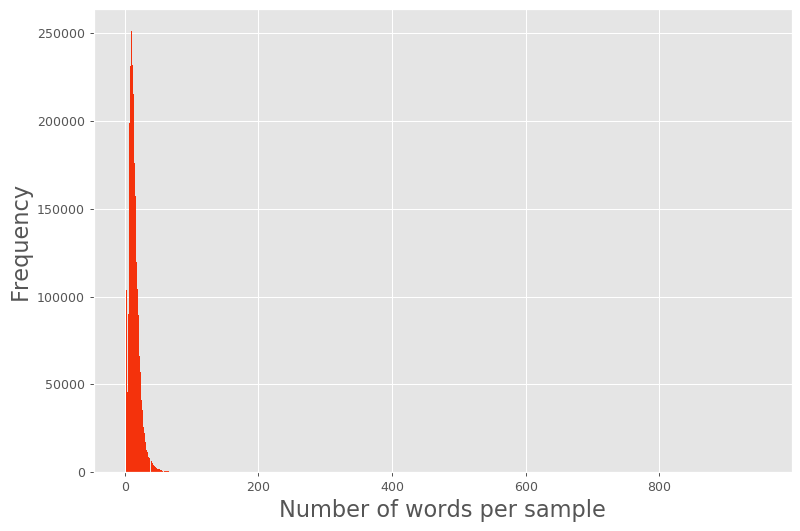

╒═════════╤══════════╤═════════╤═════════╤══════════╕
│    Mean │   Median │   Stdev │   1%ile │   99%ile │
╞═════════╪══════════╪═════════╪═════════╪══════════╡
│ 14.2297 │  12.0000 │  9.1208 │  2.0000 │  45.0000 │
╘═════════╧══════════╧═════════╧═════════╧══════════╛


In [10]:
# distribution of number of words in a sample
plot_length_distribution_and_tabulate_statistics([len(toks) for toks in tokens], 'Number of words per sample')

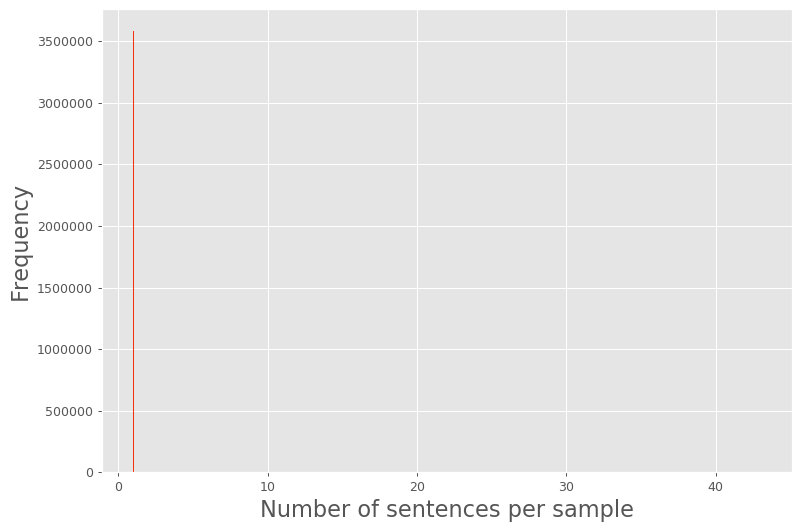

╒════════╤══════════╤═════════╤═════════╤══════════╕
│   Mean │   Median │   Stdev │   1%ile │   99%ile │
╞════════╪══════════╪═════════╪═════════╪══════════╡
│ 1.0047 │   1.0000 │  0.1193 │  1.0000 │   1.0000 │
╘════════╧══════════╧═════════╧═════════╧══════════╛


In [11]:
# distribution of number of sentences in a sample
plot_length_distribution_and_tabulate_statistics([len(sents) for sents in sentences], 'Number of sentences per sample')